## An Introduction to Instrumental Variables
_Bryan Graham_
_University of California at Berkeley_  
_March 2025_
<br>
<br>
#### Code citation:
<br>
Graham, Bryan S. (2025). "An Introduction to Instrumental Variables Python Jupyter Notebook," (Version 1.0) [Computer program]. Available at http://bryangraham.github.io/econometrics/ (Accessed 17 May 2025)
<br>
<br>

In [2]:
# Load libraries
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.sandbox.regression.gmm import IV2SLS
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Directory where data files are located
data     =  '/Users/bgraham/Dropbox/Teaching/Berkeley_Courses/MaCSS/Data/'
graphics = '/Users/bgraham/Dropbox/Teaching/Berkeley_Courses/MaCSS/Graphics/'

# Maternal smoking and infant birth weight

In [5]:
url = "https://www.stat.berkeley.edu/users/statlabs/data/babiesI.data"
bw = pd.read_csv(url, header="infer", delimiter=r"\s+")
bw.rename(columns={'bwt': 'birth_weight'}, inplace=True)

In [6]:
bw[0:20]

,birth_weight,smoke
0,120,0
1,113,0
2,128,1
3,123,0
4,108,1
5,136,0
6,138,0
7,132,0
8,120,0
9,143,1


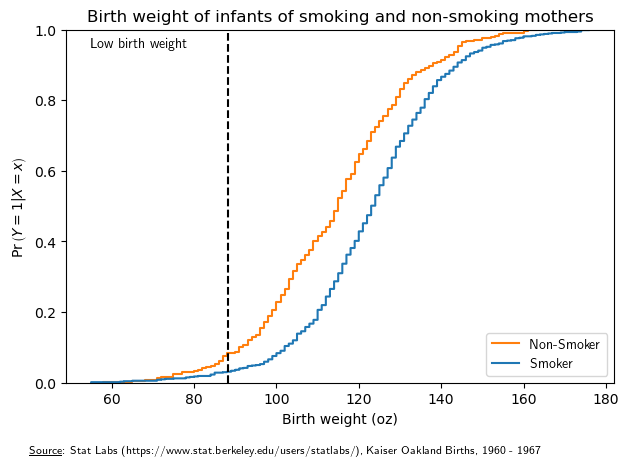

In [7]:
sns.ecdfplot(data=bw[bw['smoke']!=9], x='birth_weight', hue='smoke')
plt.axvline(x=88.1849, color='k', linestyle='--')
plt.rc('text', usetex=True)
plt.text(55, 0.95, "Low birth weight", fontsize=10, color='k')
plt.text(40, -0.20, r'\underline{Source}: Stat Labs (https://www.stat.berkeley.edu/users/statlabs/), Kaiser Oakland Births, 1960 - 1967', fontsize=8, color='k')
plt.xlabel('Birth weight (oz)')
plt.ylabel(r'$\Pr\left(\left.Y=1\right|X=x\right)$')
plt.title('Birth weight of infants of smoking and non-smoking mothers')
plt.legend(labels=["Non-Smoker", "Smoker"], loc = "lower right")

# Save result
plt.tight_layout()
plt.savefig(graphics+'kaiser_births.png')

# Using Geographic Variation in College Proximity to Estimate the Return to Schooling

Card, David. (1995). "Using Geographic Variation in College Proximity to Estimate the Return to Schooling," _Aspects of Labour Market Behaviour: Essays in Honour of John Vanderkamp_ (L. N. Christofides, E. K. Grant & R. Swidinsky, Eds.): 201 - 221. Toronto: University of Toronto Press.

In [9]:
# Column names as provided in Card (1995) documentation
columns = ['id', 'nearc2', 'nearc4', 'nearc4a', 'nearc4b', 'ed76', 'ed66', 'age76', \
           'daded', 'nodaded', 'momed', 'nomomed', 'weight', 'momdad14', 'sinmom14', 'step14', \
           'reg661', 'reg662', 'reg663', 'reg664', 'reg665', 'reg666', 'reg667', 'reg668', 'reg669', 'south66', \
           'work76', 'work78', 'lwage76', 'lwage78', 'famed', 'black', 'smsa76r', 'smsa78r', 'reg76r', 'reg78r', 'reg80r', \
           'smsa66r', 'wage76', 'wage78', 'wage80', 'noint78', 'noint80', 'enroll76', 'enroll78', 'enroll80', 'kww', 'iq', \
           'marsta76', 'marsta78', 'marsta80', 'libcrd14']

proximity = pd.read_csv(data+'proximity/nls.csv', index_col=0, header=None, names=columns)             # reading in dataset     
proximity.replace('.', np.nan, inplace=True)                                              # replace '.' with numpy np.nan
proximity['age76_sq'] = proximity['age76']**2                                             # create age squared measure
proximity['college'] = (proximity['ed76']>=16)*1                                          # indicator for college

In [10]:
proximity[0:5]

,nearc2,nearc4,nearc4a,nearc4b,ed76,ed66,age76,daded,nodaded,momed,...,enroll78,enroll80,kww,iq,marsta76,marsta78,marsta80,libcrd14,age76_sq,college
id,,,,,,,,,,,,,,,,,,,,,
2,0,0,0,0,7,5,29,9.94,1,10.25,...,0,0,15,NaN,1,1,1,0,841,0
3,0,0,0,0,12,11,27,8.00,0,8.00,...,0,0,35,93,1,4,4,1,729,0
4,0,0,0,0,12,12,34,14.00,0,12.00,...,NaN,NaN,42,103,1,NaN,NaN,1,1156,0
5,1,1,1,0,11,11,27,11.00,0,12.00,...,NaN,0,25,88,1,NaN,5,1,729,0
6,1,1,1,0,12,12,34,8.00,0,7.00,...,0,NaN,34,108,1,1,NaN,0,1156,0


In [11]:
proximity.describe()

,nearc2,nearc4,nearc4a,nearc4b,ed76,ed66,age76,daded,nodaded,momed,...,famed,black,smsa76r,reg76r,smsa66r,noint78,noint80,enroll76,age76_sq,college
count,3613.000000,3613.000000,3613.000000,3613.000000,3613.000000,3613.000000,3613.000000,3613.000000,3613.000000,3613.000000,...,3613.000000,3613.000000,3613.000000,3613.000000,3613.000000,3613.000000,3613.000000,3613.000000,3613.000000,3613.000000
mean,0.431774,0.678107,0.492112,0.185995,13.225298,10.742873,28.175201,10.002878,0.224190,10.342167,...,5.912815,0.230003,0.694714,0.399668,0.642679,0.081373,0.106836,0.094658,803.899529,0.268198
std,0.495392,0.467267,0.500007,0.389157,2.749741,2.459085,3.171810,3.296021,0.417106,3.029378,...,2.650432,0.420893,0.460592,0.489898,0.479277,0.273445,0.308948,0.292783,182.991156,0.443083
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,24.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,576.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,12.000000,9.000000,25.000000,8.000000,0.000000,8.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,625.000000,0.000000
50%,0.000000,1.000000,0.000000,0.000000,13.000000,11.000000,28.000000,9.940000,0.000000,11.000000,...,6.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,784.000000,0.000000
75%,1.000000,1.000000,1.000000,0.000000,16.000000,12.000000,31.000000,12.000000,0.000000,12.000000,...,8.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,961.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,18.000000,18.000000,34.000000,18.000000,1.000000,18.000000,...,9.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1156.000000,1.000000


In [20]:
# All needed data, make sure they are floats
W = proximity[['lwage76', 'ed76', 'college', 'age76', 'age76_sq', 'black', 'nearc4a']].astype(float) 
W = W.dropna()

In [22]:
# create a crosstab table of gender and education level with mean score
ct = pd.crosstab((W['nearc4a']), W['college'], margins=True, normalize='index')
print(ct)

college       0.0       1.0
nearc4a                    
0.0      0.768173  0.231827
1.0      0.687795  0.312205
All      0.728571  0.271429


In [24]:
means = W.groupby('nearc4a')[['lwage76', 'college']].mean()
print(means.T)

nearc4a       0.0       1.0
lwage76  6.186121  6.339789
college  0.231827  0.312205


In [26]:
Y = W['lwage76']

X = W[['college', 'age76', 'age76_sq', 'black']]
X = sm.add_constant(X)

wage_ols = sm.OLS(Y, X)
results = wage_ols.fit(cov_type='HC1')
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                lwage76   R-squared:                       0.194
Model:                            OLS   Adj. R-squared:                  0.193
Method:                 Least Squares   F-statistic:                     177.7
Date:                Sun, 06 Apr 2025   Prob (F-statistic):          8.56e-137
Time:                        23:01:49   Log-Likelihood:                -1501.2
No. Observations:                3010   AIC:                             3012.
Df Residuals:                    3005   BIC:                             3042.
Df Model:                           4                                         
Covariance Type:                  HC1                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.7462      0.695      5.393      0.0

In [28]:
Z = W[['nearc4a', 'age76', 'age76_sq', 'black']]
Z = sm.add_constant(Z)

wage_iv = IV2SLS(endog=Y, exog=sm.add_constant(W['college']), instrument=sm.add_constant(W['nearc4a']))
results = wage_iv.fit()
print(results.summary())

                          IV2SLS Regression Results                           
Dep. Variable:                lwage76   R-squared:                      -2.795
Model:                         IV2SLS   Adj. R-squared:                 -2.796
Method:                     Two Stage   F-statistic:                     23.76
                        Least Squares   Prob (F-statistic):           1.15e-06
Date:                Sun, 06 Apr 2025                                         
Time:                        23:02:18                                         
No. Observations:                3010                                         
Df Residuals:                    3008                                         
Df Model:                           1                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.7429      0.108     53.367      0.0